<a href="https://colab.research.google.com/github/Joab-S/SimulacaoEstocasticaUFC/blob/main/EstoqueSimuT4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import random as r
import simpy as sp
import numpy as np
import matplotlib.pyplot as mp

In [79]:
TAXA_DEMANDA = 4
MEDIA_DEMANDA = 10
VARIANCIA_DEMANDA = 4
TAXA_REPOSICAO = 1/30
CORTE_s = 200
CAPACIDADE_S = 1000
N_CLIENTES = 0
NAO_ATENDIDOS = 0
estoque_atual = CAPACIDADE_S
LIMITE = 1825 # Dias em 5 anos
custo = 0
LISTA_ESTOQUE = []
CLIENTES_ATENDIDOS = []
CLIENTES_REJEITADOS = []

In [5]:
def custoEntrega(quantity):
  preco_base = np.random.normal(20, 10)

  return (preco_base * quantity)

In [130]:
def venda(env):
  global CORTE_s, estoque_atual, custo
  global MEDIA_DEMANDA, VARIANCIA_DEMANDA
  global N_CLIENTES, TAXA_DEMANDA, NAO_ATENDIDOS
  global CAPACIDADE_S
  
  #valor_produto = np.random.normal(25, 10)

  while True:
    yield env.timeout(np.random.exponential(TAXA_DEMANDA))
    N_CLIENTES += 1
    n_pedido = 0
    while (n_pedido == 0):
      n_pedido = int(np.random.normal(MEDIA_DEMANDA, VARIANCIA_DEMANDA**2))
      if (n_pedido < 0):
        n_pedido *= -1
    
    q = min(estoque_atual, n_pedido)
    if (q <= 0):
      NAO_ATENDIDOS += 1
      CLIENTES_REJEITADOS.append(NAO_ATENDIDOS)
      CLIENTES_ATENDIDOS.append(N_CLIENTES - NAO_ATENDIDOS)
      #print("Vendas não atendidas:", NAO_ATENDIDOS, "- Clientes:", N_CLIENTES, "- Estoque:", estoque_atual)

    elif (estoque_atual > 0):
      estoque_atual -= q
      LISTA_ESTOQUE.append(estoque_atual)
      #custo -= q * valor_produto
      if (estoque_atual + q > CORTE_s and estoque_atual < CORTE_s):
        env.process(reposicao(env, CAPACIDADE_S - estoque_atual))
    
      #print("Vendas atendidas:", (N_CLIENTES - NAO_ATENDIDOS), "- Clientes:", N_CLIENTES, "- Estoque:", estoque_atual)
      CLIENTES_ATENDIDOS.append(N_CLIENTES - NAO_ATENDIDOS)
      CLIENTES_REJEITADOS.append(NAO_ATENDIDOS)
    #custo += (n_pedido-q) * valor_produto
    #yield env.timeout(np.random.exponential(TAXA_DEMANDA))

In [131]:
def reposicao(env, y):
  global TAXA_REPOSICAO
  global estoque_atual, custo

  #print("Solicitação de Reposição, Estoque atual:", estoque_atual)
  yield env.timeout(np.random.exponential(1/TAXA_REPOSICAO))

  estoque_atual += y
  LISTA_ESTOQUE.append(estoque_atual)
  #print("Uma reposição foi feita. Estoque Antes =", estoque_atual - y, "- Estoque Atual =", estoque_atual)
  #custo += custoEntrega(y)

In [132]:
def initVar():
  global TAXA_DEMANDA, MEDIA_DEMANDA, VARIANCIA_DEMANDA, TAXA_REPOSICAO
  global CAPACIDADE_S, NAO_ATENDIDOS, estoque_atual, LIMITE, custo,  CORTE_s, N_CLIENTES
  global LISTA_ESTOQUE, CLIENTES_ATENDIDOS, CLIENTES_REJEITADOS

  TAXA_DEMANDA = 4
  MEDIA_DEMANDA = 10
  VARIANCIA_DEMANDA = 4
  TAXA_REPOSICAO = 1/30
  CORTE_s = 400
  CAPACIDADE_S = 1000
  N_CLIENTES = 0
  NAO_ATENDIDOS = 0
  estoque_atual = CAPACIDADE_S
  LIMITE = 1825 # Dias em 5 anos
  custo = 0
  LISTA_ESTOQUE = []
  CLIENTES_ATENDIDOS = []
  CLIENTES_REJEITADOS = []

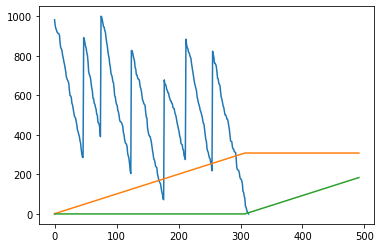

In [141]:
def systemSim():
  global TAXA_DEMANDA, MEDIA_DEMANDA, VARIANCIA_DEMANDA, TAXA_REPOSICAO
  global CAPACIDADE_S, NAO_ATENDIDOS, estoque_atual, LIMITE, custo,  CORTE_s, N_CLIENTES
  global LISTA_ESTOQUE, CLIENTES_ATENDIDOS, CLIENTES_REJEITADOS

  initVar()

  env = sp.Environment()
  env.process(venda(env))
  env.run(until=LIMITE)


systemSim()

mp.plot(LISTA_ESTOQUE, label="Estoque ao longo do tempo")
mp.plot(CLIENTES_ATENDIDOS, label="Clientes atendidos ao longo do tempo")
mp.plot(CLIENTES_REJEITADOS, label="Clientes rejeitados ao longo do tempo")

#print(N_CLIENTES)